# Title: Chronic Disease Indicator

## Import the libraries

In [1]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

## Importing data

In [2]:
df_source=pd.read_csv('Chronic_Disease_Indicators.csv')
df_source.head()

C:\Users\hplap\AppData\Local\Temp\ipykernel_12540\329364451.py:1: DtypeWarning: Columns (7,10,18,19,20,21,23,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_source=pd.read_csv('Chronic_Disease_Indicators.csv')


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,2,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,1,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,5,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,6,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN


## **1. Descriptive Statistics**

In [3]:
# For Numerical Data
df_source.describe()

,YearStart,YearEnd,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,403984.000000,403984.000000,2.736660e+05,246819.000000,246819.000000,403984.000000
mean,2012.729851,2012.756698,7.270473e+02,49.729946,62.654180,31.003374
std,1.546388,1.515176,1.798349e+04,83.633664,95.980311,17.700259
min,2001.000000,2001.000000,0.000000e+00,0.200000,0.420000,1.000000
25%,2011.000000,2012.000000,1.890000e+01,13.000000,20.200000,17.000000
50%,2013.000000,2013.000000,4.160000e+01,31.100000,45.600000,30.000000
75%,2014.000000,2014.000000,7.100000e+01,57.400000,72.200000,45.000000
max,2016.000000,2016.000000,3.967333e+06,1293.900000,2088.000000,78.000000


## **2. Understanding and Cleaning the data**

In [4]:
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403984 entries, 0 to 403983
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  403984 non-null  int64  
 1   YearEnd                    403984 non-null  int64  
 2   LocationAbbr               403984 non-null  object 
 3   LocationDesc               403984 non-null  object 
 4   DataSource                 403984 non-null  object 
 5   Topic                      403984 non-null  object 
 6   Question                   403984 non-null  object 
 7   Response                   79323 non-null   object 
 8   DataValueUnit              374119 non-null  object 
 9   DataValueType              403984 non-null  object 
 10  DataValue                  297817 non-null  object 
 11  DataValueAlt               273666 non-null  float64
 12  DataValueFootnoteSymbol    188019 non-null  object 
 13  DatavalueFootnote          18

In [5]:
# features that are completely filled
(df_source.count()/len(df_source))*100

YearStart                    100.000000
YearEnd                      100.000000
LocationAbbr                 100.000000
LocationDesc                 100.000000
DataSource                   100.000000
Topic                        100.000000
Question                     100.000000
Response                      19.635184
DataValueUnit                 92.607380
DataValueType                100.000000
DataValue                     73.719999
DataValueAlt                  67.741792
DataValueFootnoteSymbol       46.541200
DatavalueFootnote             46.500109
LowConfidenceLimit            61.096232
HighConfidenceLimit           61.096232
StratificationCategory1      100.000000
Stratification1              100.000000
StratificationCategory2       19.635184
Stratification2               19.635184
StratificationCategory3       19.635184
Stratification3               19.635184
GeoLocation                   99.364331
ResponseID                    19.635184
LocationID                   100.000000


In [6]:
def df_values(df):
    for i in range(0, len(df.columns)):
        print("=======start of feature ", df.columns[i], "=====================")
        print (df.iloc[:,i].value_counts())
        print ("======end of feature ", df.columns[i], "===================== \n")

In [7]:
#Exploring the values of every feature
df_values(df_source)

=======start of feature  YearStart =====================
2013    85913
2012    75796
2014    75524
2011    74593
2015    64046
2010    24965
2009     2771
2016      109
2008      108
2001      104
2007       55
Name: YearStart, dtype: int64
======end of feature  YearStart ===================== 

=======start of feature  YearEnd =====================
2013    88409
2012    76108
2014    75524
2011    74556
2015    64046
2010    24965
2016      109
2008      108
2001      104
2007       55
Name: YearEnd, dtype: int64
======end of feature  YearEnd ===================== 

=======start of feature  LocationAbbr =====================
NC    7779
KY    7779
SC    7779
NV    7779
NJ    7779
WI    7779
NE    7779
NY    7778
AZ    7747
FL    7747
IA    7746
VT    7732
HI    7688
OR    7680
NM    7680
MI    7680
SD    7680
WV    7680
WA    7680
AR    7648
CO    7647
UT    7575
MD    7575
RI    7575
MA    7574
CA    7542
MS    7533
PA    7386
OK    7386
OH    7386
WY    7386
KS    7386
LA    7386
VA 

Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%                                                                                                                                                                                                                                                                                                                                                                            80363
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           56022
No dat

     79323
Name: StratificationCategoryID3, dtype: int64
======end of feature  StratificationCategoryID3 ===================== 

=======start of feature  StratificationID3 =====================
     79323
Name: StratificationID3, dtype: int64
======end of feature  StratificationID3 ===================== 



In [8]:
# Drop features that are considered meaningless
indexes=[18,19,20,21,22,23,24,30,31,32,33]
df_source=df_source.drop(df_source.columns[indexes],axis=1)

In [9]:
#info() and non-null percentage distribution among features
print(df_source.info())
print((df_source.count()/len(df_source))*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403984 entries, 0 to 403983
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  403984 non-null  int64  
 1   YearEnd                    403984 non-null  int64  
 2   LocationAbbr               403984 non-null  object 
 3   LocationDesc               403984 non-null  object 
 4   DataSource                 403984 non-null  object 
 5   Topic                      403984 non-null  object 
 6   Question                   403984 non-null  object 
 7   Response                   79323 non-null   object 
 8   DataValueUnit              374119 non-null  object 
 9   DataValueType              403984 non-null  object 
 10  DataValue                  297817 non-null  object 
 11  DataValueAlt               273666 non-null  float64
 12  DataValueFootnoteSymbol    188019 non-null  object 
 13  DatavalueFootnote          18

In [10]:
df_source_filtered=df_source.dropna(how='all', subset=['DataValue','DataValueAlt'])
df_source_filtered.reset_index(drop=True, inplace=True)
df_source_filtered.shape


(297817, 23)

In [11]:
df_source_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297817 entries, 0 to 297816
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  297817 non-null  int64  
 1   YearEnd                    297817 non-null  int64  
 2   LocationAbbr               297817 non-null  object 
 3   LocationDesc               297817 non-null  object 
 4   DataSource                 297817 non-null  object 
 5   Topic                      297817 non-null  object 
 6   Question                   297817 non-null  object 
 7   Response                   79284 non-null   object 
 8   DataValueUnit              268822 non-null  object 
 9   DataValueType              297817 non-null  object 
 10  DataValue                  297817 non-null  object 
 11  DataValueAlt               273666 non-null  float64
 12  DataValueFootnoteSymbol    81852 non-null   object 
 13  DatavalueFootnote          81

In [12]:
df_source_filtered['Topic'].value_counts()

Cardiovascular Disease                             52816
Diabetes                                           44109
Chronic Obstructive Pulmonary Disease              36815
Nutrition, Physical Activity, and Weight Status    26507
Overarching Conditions                             23453
Arthritis                                          22255
Asthma                                             21461
Alcohol                                            20129
Tobacco                                            16305
Chronic Kidney Disease                              9851
Cancer                                              6399
Oral Health                                         5777
Mental Health                                       4395
Immunization                                        3553
Older Adults                                        2829
Reproductive Health                                 1110
Disability                                            53
Name: Topic, dtype: int64

In [13]:
df_cvd=df_source_filtered[df_source_filtered['Topic']=='Cardiovascular Disease']
df_cvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52816 entries, 11034 to 293242
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  52816 non-null  int64  
 1   YearEnd                    52816 non-null  int64  
 2   LocationAbbr               52816 non-null  object 
 3   LocationDesc               52816 non-null  object 
 4   DataSource                 52816 non-null  object 
 5   Topic                      52816 non-null  object 
 6   Question                   52816 non-null  object 
 7   Response                   33339 non-null  object 
 8   DataValueUnit              42434 non-null  object 
 9   DataValueType              52816 non-null  object 
 10  DataValue                  52816 non-null  object 
 11  DataValueAlt               46495 non-null  float64
 12  DataValueFootnoteSymbol    33540 non-null  object 
 13  DatavalueFootnote          33465 non-null

In [14]:
df_cvd['Question'].value_counts()

Mortality from heart failure                                                                                                   6136
Mortality from total cardiovascular diseases                                                                                   6135
Mortality from cerebrovascular disease (stroke)                                                                                6135
Mortality from diseases of the heart                                                                                           6135
Mortality from coronary heart disease                                                                                          6135
Cholesterol screening among adults aged >= 18 years                                                                            2442
Awareness of high blood pressure among adults aged >= 18 years                                                                 2422
Influenza vaccination among noninstitutionalized adults aged 18-64 years wit

### 2.1 Focusing on mortalities of cardiovascular diseases

In [15]:
# A first analysis is done about mortality:
# 1.'Mortality from heart failure',
# 2.'Mortality from cerebrovascular disease (stroke)',
# 3.'Mortality from diseases of the heart',
# 4.'Mortality from total cardiovascular diseases'
df_cvd_mortality=df_cvd[(df_cvd['Question']=='Mortality from heart failure')
                        |(df_cvd['Question']=='Mortality from cerebrovascular disease (stroke)')
                        |(df_cvd['Question']=='Mortality from diseases of the heart')
                        |(df_cvd['Question']=='Mortality from total cardiovascular diseases')]
df_values(df_cvd_mortality)


=======start of feature  YearStart =====================
2010    4909
2014    4908
2013    4908
2012    4908
2011    4908
Name: YearStart, dtype: int64
======end of feature  YearStart ===================== 

=======start of feature  YearEnd =====================
2010    4909
2014    4908
2013    4908
2012    4908
2011    4908
Name: YearEnd, dtype: int64
======end of feature  YearEnd ===================== 

=======start of feature  LocationAbbr =====================
FL    481
NE    480
ND    480
GA    480
HI    480
IL    480
KY    480
LA    480
MD    480
ME    480
MS    480
MT    480
NC    480
NH    480
NM    480
NJ    480
NY    480
OR    480
PA    480
RI    480
SC    480
TN    480
TX    480
VT    480
WA    480
DC    480
AZ    480
CA    480
AL    480
SD    480
UT    480
WY    480
AR    480
CO    480
DE    480
IA    480
NV    480
ID    480
OK    480
VA    480
KS    480
WI    480
AK    480
MA    480
CT    480
MI    480
MN    480
IN    480
MO    480
OH    480
WV    480
US     60
Name: Loca

In [16]:
#There are 4497 rows with 'DataValue' blank, so lets drop those empty values
df_cvd_mortality=df_cvd_mortality[df_cvd_mortality['DataValue']!=' ']
df_cvd_mortality.reset_index(drop=True, inplace=True)
print(df_cvd_mortality['DataValue'].value_counts())
print(df_cvd_mortality.shape)


20      46
25      44
30      44
27      42
22      41
        ..
1036     1
597      1
8885     1
7450     1
1104     1
Name: DataValue, Length: 6748, dtype: int64
(20044, 23)


In [17]:
df_cvd_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20044 entries, 0 to 20043
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  20044 non-null  int64  
 1   YearEnd                    20044 non-null  int64  
 2   LocationAbbr               20044 non-null  object 
 3   LocationDesc               20044 non-null  object 
 4   DataSource                 20044 non-null  object 
 5   Topic                      20044 non-null  object 
 6   Question                   20044 non-null  object 
 7   Response                   20043 non-null  object 
 8   DataValueUnit              13362 non-null  object 
 9   DataValueType              20044 non-null  object 
 10  DataValue                  20044 non-null  object 
 11  DataValueAlt               20044 non-null  float64
 12  DataValueFootnoteSymbol    20043 non-null  object 
 13  DatavalueFootnote          19983 non-null  obj

In [18]:
# Lets drop another features considered meaningless in the filtered df:
# DataSource, Response,DataValueFootnoteSymbol,DatavalueFootnote,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1 
indexes=[4,7,12,13,18,19,20,21,22]
df_cvd_mortality=df_cvd_mortality.drop(df_cvd_mortality.columns[indexes],axis=1)
print(df_cvd_mortality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20044 entries, 0 to 20043
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                20044 non-null  int64  
 1   YearEnd                  20044 non-null  int64  
 2   LocationAbbr             20044 non-null  object 
 3   LocationDesc             20044 non-null  object 
 4   Topic                    20044 non-null  object 
 5   Question                 20044 non-null  object 
 6   DataValueUnit            13362 non-null  object 
 7   DataValueType            20044 non-null  object 
 8   DataValue                20044 non-null  object 
 9   DataValueAlt             20044 non-null  float64
 10  LowConfidenceLimit       13362 non-null  float64
 11  HighConfidenceLimit      13362 non-null  float64
 12  StratificationCategory1  20044 non-null  object 
 13  Stratification1          20044 non-null  object 
dtypes: float64(3), int64(2

In [19]:
df_cvd_mortality

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2014,2014,NE,Nebraska,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,3296,3296.0,NaN,NaN,Overall,Overall
1,2014,2014,NM,New Mexico,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,3424,3424.0,NaN,NaN,Overall,Overall
2,2014,2014,SD,South Dakota,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,1704,1704.0,NaN,NaN,Overall,Overall
3,2014,2014,UT,Utah,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,3431,3431.0,NaN,NaN,Overall,Overall
4,2014,2014,WY,Wyoming,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,1035,1035.0,NaN,NaN,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20039,2010,2010,WV,West Virginia,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),NaN,Number,1069,1069.0,NaN,NaN,Race/Ethnicity,"White, non-Hispanic"
20040,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),NaN,Number,133,133.0,NaN,NaN,Gender,Female
20041,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),NaN,Number,71,71.0,NaN,NaN,Gender,Male
20042,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),NaN,Number,204,204.0,NaN,NaN,Overall,Overall


### **2.2 Study the stratification feature and see the difference the overall value and rest**

In [20]:
# When DataValueUnit is NaN the figure expressed in DataValue is unknown, 
# thus let's drop those rows to carried out an precise analysis
df_cvd_mortality.dropna(subset=['DataValueUnit'], inplace=True)
df_cvd_mortality.reset_index(drop=True, inplace=True)
df_cvd_mortality

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2014,2014,AK,Alaska,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,189,189.0,174.4,203.7,Race/Ethnicity,"White, non-Hispanic"
1,2014,2014,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,153.1,153.1,148.5,157.7,Gender,Female
2,2014,2014,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,139.1,139.1,123.3,154.9,Race/Ethnicity,Hispanic
3,2014,2014,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,230.7,230.7,223.7,237.6,Gender,Male
4,2014,2014,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,186.4,186.4,182.5,190.4,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,2010,2010,WV,West Virginia,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,61.3,61.3,57.6,65.0,Race/Ethnicity,"White, non-Hispanic"
13358,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,48.2,48.2,40.0,56.3,Gender,Female
13359,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,24.7,24.7,19.3,31.2,Gender,Male
13360,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,36.2,36.2,31.2,41.2,Overall,Overall


In [21]:
# Merge features regarding year if possible
print((df_cvd_mortality['YearStart']==df_cvd_mortality['YearEnd']).value_counts())
df_cvd_mortality['Year']=df_cvd_mortality['YearStart']
df_cvd_mortality.drop(['YearStart','YearEnd'], axis=1, inplace=True)
df_cvd_mortality.head()


True    13362
dtype: int64


,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Year
0,AK,Alaska,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,189,189.0,174.4,203.7,Race/Ethnicity,"White, non-Hispanic",2014
1,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,153.1,153.1,148.5,157.7,Gender,Female,2014
2,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,139.1,139.1,123.3,154.9,Race/Ethnicity,Hispanic,2014
3,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,230.7,230.7,223.7,237.6,Gender,Male,2014
4,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,186.4,186.4,182.5,190.4,Overall,Overall,2014


In [22]:
df_cvd_mortality['Question'].value_counts()

Mortality from total cardiovascular diseases       3600
Mortality from diseases of the heart               3496
Mortality from heart failure                       3216
Mortality from cerebrovascular disease (stroke)    3050
Name: Question, dtype: int64

## 3. Descriptive yearly analysis of different mortalities

In [23]:
df_cvd_mortality['DataValue']=pd.to_numeric(df_cvd_mortality['DataValue'])
df_cvd_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13362 entries, 0 to 13361
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LocationAbbr             13362 non-null  object 
 1   LocationDesc             13362 non-null  object 
 2   Topic                    13362 non-null  object 
 3   Question                 13362 non-null  object 
 4   DataValueUnit            13362 non-null  object 
 5   DataValueType            13362 non-null  object 
 6   DataValue                13362 non-null  float64
 7   DataValueAlt             13362 non-null  float64
 8   LowConfidenceLimit       13362 non-null  float64
 9   HighConfidenceLimit      13362 non-null  float64
 10  StratificationCategory1  13362 non-null  object 
 11  Stratification1          13362 non-null  object 
 12  Year                     13362 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 1.3+ MB


In [24]:
# Separating into different dataframes depending on 'Question' value
# df_cvd (1 - 4)
df_cvd_mortality_cardio_disease=df_cvd_mortality[df_cvd_mortality['Question']=='Mortality from total cardiovascular diseases']
df_cvd_mortality_diseases_heart=df_cvd_mortality[df_cvd_mortality['Question']=='Mortality from diseases of the heart']
df_cvd_mortality_heart_failure=df_cvd_mortality[df_cvd_mortality['Question']=='Mortality from heart failure']
df_cvd_mortality_cerebrovascular=df_cvd_mortality[df_cvd_mortality['Question']=='Mortality from cerebrovascular disease (stroke)']


### 3.1 Year evolution of mortality from total cardiovascular diseases

In [25]:
# Show the evolution of deaths by total cardiovascular diseases through the years
# The datavalues regarding the overall, male and female count

df_cvd_1_overall=df_cvd_mortality_cardio_disease[df_cvd_mortality_cardio_disease['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_1_overall.rename(columns={'DataValue':'DV_overall'},inplace=True)
df_cvd_1_male=df_cvd_mortality_cardio_disease[df_cvd_mortality_cardio_disease['Stratification1']=='Male'].groupby('Year').sum()
df_cvd_1_male.rename(columns={'DataValue':'DV_male'},inplace=True)
df_cvd_1_female=df_cvd_mortality_cardio_disease[df_cvd_mortality_cardio_disease['Stratification1']=='Female'].groupby('Year').sum()
df_cvd_1_female.rename(columns={'DataValue':'DV_female'},inplace=True)

df_cvd_1_merged=pd.merge(df_cvd_1_overall,df_cvd_1_male,on='Year', how='inner')
df_cvd_1_merged=pd.merge(df_cvd_1_merged,df_cvd_1_female,on='Year', how='inner')
df_cvd_1_merged=df_cvd_1_merged[['DV_overall','DV_male','DV_female']]
df_cvd_1_merged



,DV_overall,DV_male,DV_female
Year,,,
2010,25472.5,27479.8,22961.6
2011,24968.4,27012.1,22400.5
2012,24836.7,26888.6,22265.5
2013,24875.7,27135.2,22104.5
2014,24857.8,27190.7,22008.3


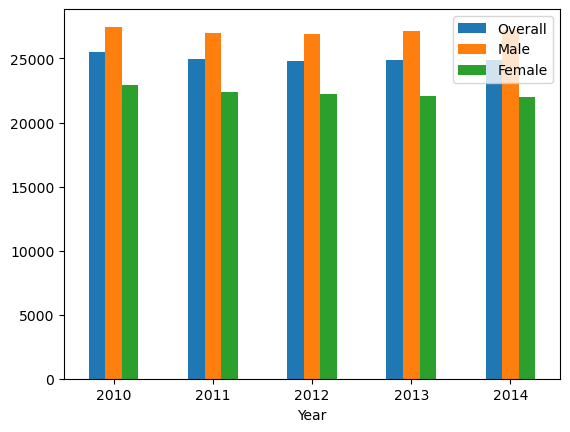

In [26]:
df_plot = pd.DataFrame({'Overall': df_cvd_1_merged['DV_overall'],
                    'Male': df_cvd_1_merged['DV_male'],
                       'Female': df_cvd_1_merged['DV_female']}, index= df_cvd_1_merged.index)
ax = df_plot.plot.bar(rot=0)

In [27]:
# It's difficult to appreciate a trend in the latter plot,
# Normalizing the value df_cvd_1_merged to see the evolution of the figures 
from sklearn import preprocessing
x=df_cvd_1_merged.values 
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cvd_1_merged_norm = pd.DataFrame(x_scaled, columns=df_cvd_1_merged.columns,index=df_cvd_1_merged.index)
df_cvd_1_merged_norm 

,DV_overall,DV_male,DV_female
Year,,,
2010,1.964388,1.702806,1.832006
2011,-0.141268,-0.649795,0.156529
2012,-0.691387,-1.271018,-0.246589
2013,-0.528482,-0.030583,-0.727344
2014,-0.603251,0.248590,-1.014603


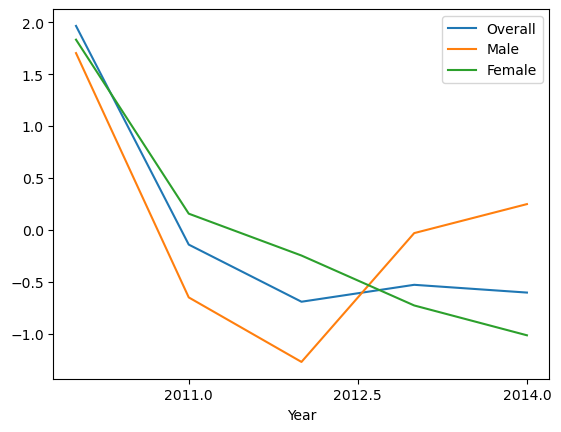

In [28]:
df_cvd_1_merged_norm_plt = pd.DataFrame({'Overall': df_cvd_1_merged_norm['DV_overall'],
                    'Male': df_cvd_1_merged_norm['DV_male'],
                       'Female': df_cvd_1_merged_norm['DV_female']}, index= df_cvd_1_merged_norm.index)
ax1 = df_cvd_1_merged_norm_plt.plot.line(rot=0)
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))

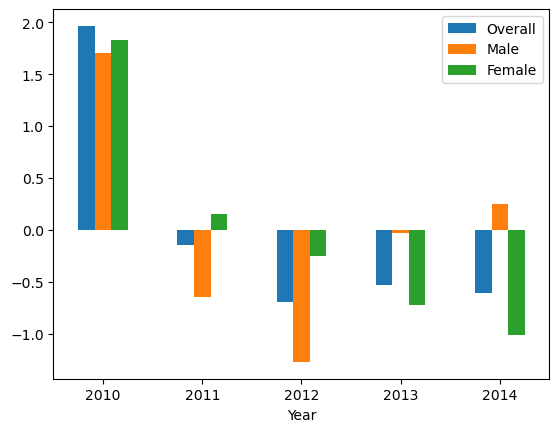

In [29]:
ax = df_cvd_1_merged_norm_plt.plot.bar(rot=0)

### 3.2 Comparison of year evolution of different mortality causes

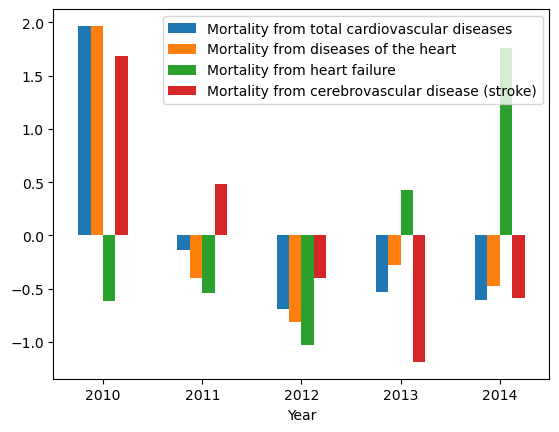

In [30]:
#Show the evolution of deaths by total cardiovascular diseases through the years

df_cvd_1_overall=df_cvd_mortality_cardio_disease[df_cvd_mortality_cardio_disease['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_2_overall=df_cvd_mortality_diseases_heart[df_cvd_mortality_diseases_heart['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_3_overall=df_cvd_mortality_heart_failure[df_cvd_mortality_heart_failure['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_4_overall=df_cvd_mortality_cerebrovascular[df_cvd_mortality_cerebrovascular['Stratification1']=='Overall'].groupby('Year').sum()

df_cvd_overall = pd.DataFrame({'Mortality from total cardiovascular diseases': df_cvd_1_overall['DataValue'],
                    'Mortality from diseases of the heart': df_cvd_2_overall['DataValue'],
                       'Mortality from heart failure': df_cvd_3_overall['DataValue'],
                       'Mortality from cerebrovascular disease (stroke)':df_cvd_4_overall['DataValue']}, index= df_cvd_1_overall.index)

x=df_cvd_overall.values 
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cvd_overall_norm = pd.DataFrame(x_scaled, columns=df_cvd_overall.columns,index=df_cvd_overall.index)
df_cvd_overall_norm 

ax = df_cvd_overall_norm.plot.bar(rot=0)

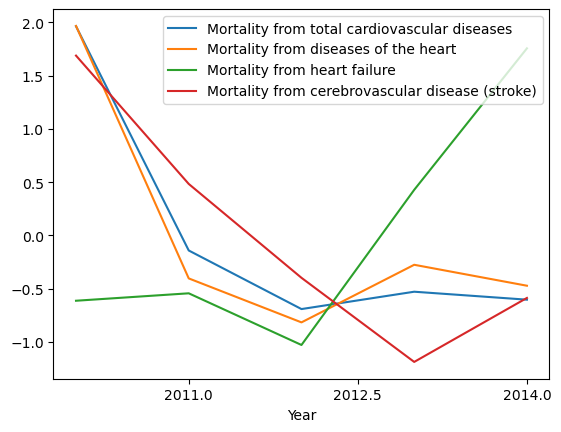

In [31]:
ax1 = df_cvd_overall_norm.plot.line(rot=0)
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))

### 3.3 Year evolution of Mortality from heart failure

In [32]:
#In the above plot the line regarding Mortality from heart failure has a anomalous slope up during 2012-2014

df_cvd_3_overall=df_cvd_mortality_heart_failure[df_cvd_mortality_heart_failure['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_3_overall.rename(columns={'DataValue':'DV_overall'},inplace=True)
df_cvd_3_male=df_cvd_mortality_heart_failure[df_cvd_mortality_heart_failure['Stratification1']=='Male'].groupby('Year').sum()
df_cvd_3_male.rename(columns={'DataValue':'DV_male'},inplace=True)
df_cvd_3_female=df_cvd_mortality_heart_failure[df_cvd_mortality_heart_failure['Stratification1']=='Female'].groupby('Year').sum()
df_cvd_3_female.rename(columns={'DataValue':'DV_female'},inplace=True)

df_cvd_3_merged=pd.merge(df_cvd_3_overall,df_cvd_3_male,on='Year', how='inner')
df_cvd_3_merged=pd.merge(df_cvd_3_merged,df_cvd_3_female,on='Year', how='inner')
df_cvd_3_merged=df_cvd_3_merged[['DV_overall','DV_male','DV_female']]
df_cvd_3_merged


,DV_overall,DV_male,DV_female
Year,,,
2010,9530.8,9734.4,9202.0
2011,9542.9,9753.6,9191.4
2012,9458.8,9677.4,9098.4
2013,9711.3,9974.2,9288.7
2014,9941.6,10322.3,9416.2


In [33]:
x=df_cvd_3_merged.values 
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cvd_3_merged_norm = pd.DataFrame(x_scaled, columns=df_cvd_3_merged.columns,index=df_cvd_3_merged.index)


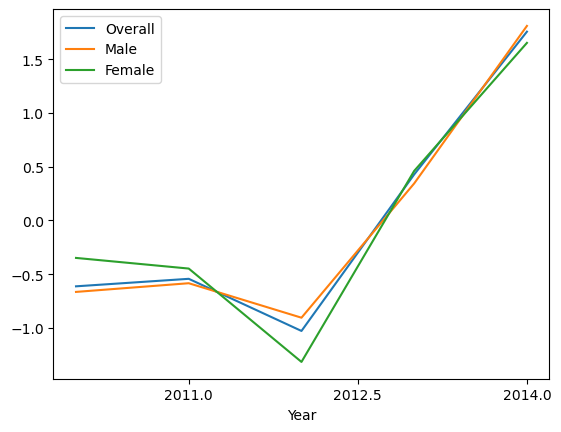

In [34]:
df_cvd_3_merged_norm_plt = pd.DataFrame({'Overall': df_cvd_3_merged_norm['DV_overall'],
                    'Male': df_cvd_3_merged_norm['DV_male'],
                       'Female': df_cvd_3_merged_norm['DV_female']}, index= df_cvd_3_merged_norm.index)
ax3 = df_cvd_3_merged_norm_plt.plot.line(rot=0)
ax3.xaxis.set_major_locator(plt.MaxNLocator(4))

### 3.4 Year evolution of Mortality from diseases of the heart 

In [35]:
#In the above plot the line regarding Mortality from heart failure has a anomalous slope up during 2012-2014

df_cvd_2_overall=df_cvd_mortality_diseases_heart[df_cvd_mortality_diseases_heart['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_2_overall.rename(columns={'DataValue':'DV_overall'},inplace=True)
df_cvd_2_male=df_cvd_mortality_diseases_heart[df_cvd_mortality_diseases_heart['Stratification1']=='Male'].groupby('Year').sum()
df_cvd_2_male.rename(columns={'DataValue':'DV_male'},inplace=True)
df_cvd_2_female=df_cvd_mortality_diseases_heart[df_cvd_mortality_diseases_heart['Stratification1']=='Female'].groupby('Year').sum()
df_cvd_2_female.rename(columns={'DataValue':'DV_female'},inplace=True)

df_cvd_2_merged=pd.merge(df_cvd_2_overall,df_cvd_2_male,on='Year', how='inner')
df_cvd_2_merged=pd.merge(df_cvd_2_merged,df_cvd_2_female,on='Year', how='inner')
df_cvd_2_merged=df_cvd_2_merged[['DV_overall','DV_male','DV_female']]
df_cvd_2_merged

,DV_overall,DV_male,DV_female
Year,,,
2010,19292.0,21795.3,16557.2
2011,18915.9,21449.9,16130.2
2012,18850.4,21410.6,16042.1
2013,18936.2,21585.2,16029.1
2014,18905.0,21616.6,15933.1


In [36]:
x=df_cvd_2_merged.values 
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cvd_2_merged_norm = pd.DataFrame(x_scaled, columns=df_cvd_2_merged.columns,index=df_cvd_2_merged.index)


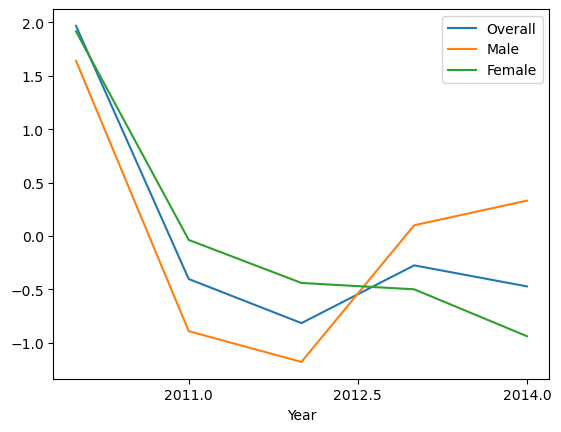

In [37]:
df_cvd_2_merged_norm_plt = pd.DataFrame({'Overall': df_cvd_2_merged_norm['DV_overall'],
                    'Male': df_cvd_2_merged_norm['DV_male'],
                       'Female': df_cvd_2_merged_norm['DV_female']}, index= df_cvd_2_merged_norm.index)
ax2 = df_cvd_2_merged_norm_plt.plot.line(rot=0)
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))

### 3.4 Year evolution of Mortality from cerebrovascular disease (stroke)

In [38]:
df_cvd_4_overall=df_cvd_mortality_cerebrovascular[df_cvd_mortality_cerebrovascular['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_4_overall.rename(columns={'DataValue':'DV_overall'},inplace=True)
df_cvd_4_male=df_cvd_mortality_cerebrovascular[df_cvd_mortality_cerebrovascular['Stratification1']=='Male'].groupby('Year').sum()
df_cvd_4_male.rename(columns={'DataValue':'DV_male'},inplace=True)
df_cvd_4_female=df_cvd_mortality_cerebrovascular[df_cvd_mortality_cerebrovascular['Stratification1']=='Female'].groupby('Year').sum()
df_cvd_4_female.rename(columns={'DataValue':'DV_female'},inplace=True)

df_cvd_4_merged=pd.merge(df_cvd_4_overall,df_cvd_4_male,on='Year', how='inner')
df_cvd_4_merged=pd.merge(df_cvd_4_merged,df_cvd_4_female,on='Year', how='inner')
df_cvd_4_merged=df_cvd_4_merged[['DV_overall','DV_male','DV_female']]
df_cvd_4_merged

,DV_overall,DV_male,DV_female
Year,,,
2010,4326.8,3845.2,4602.5
2011,4220.3,3742.2,4492.0
2012,4142.4,3680.1,4406.5
2013,4072.6,3679.2,4276.8
2014,4125.7,3730.8,4330.3


In [39]:
x=df_cvd_4_merged.values 
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cvd_4_merged_norm = pd.DataFrame(x_scaled, columns=df_cvd_4_merged.columns,index=df_cvd_4_merged.index)


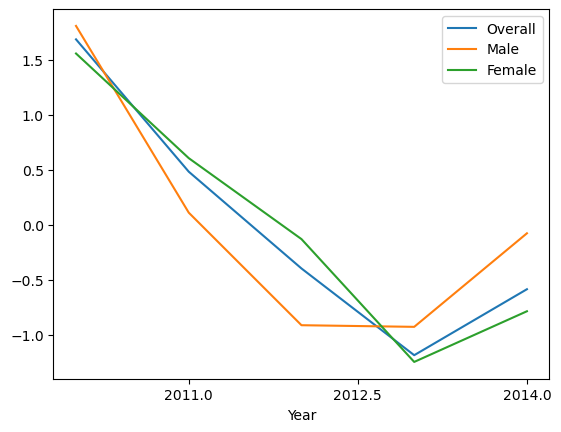

In [40]:
df_cvd_4_merged_norm_plt = pd.DataFrame({'Overall': df_cvd_4_merged_norm['DV_overall'],
                    'Male': df_cvd_4_merged_norm['DV_male'],
                       'Female': df_cvd_4_merged_norm['DV_female']}, index= df_cvd_4_merged_norm.index)
ax4 = df_cvd_4_merged_norm_plt.plot.line(rot=0)
ax4.xaxis.set_major_locator(plt.MaxNLocator(4))

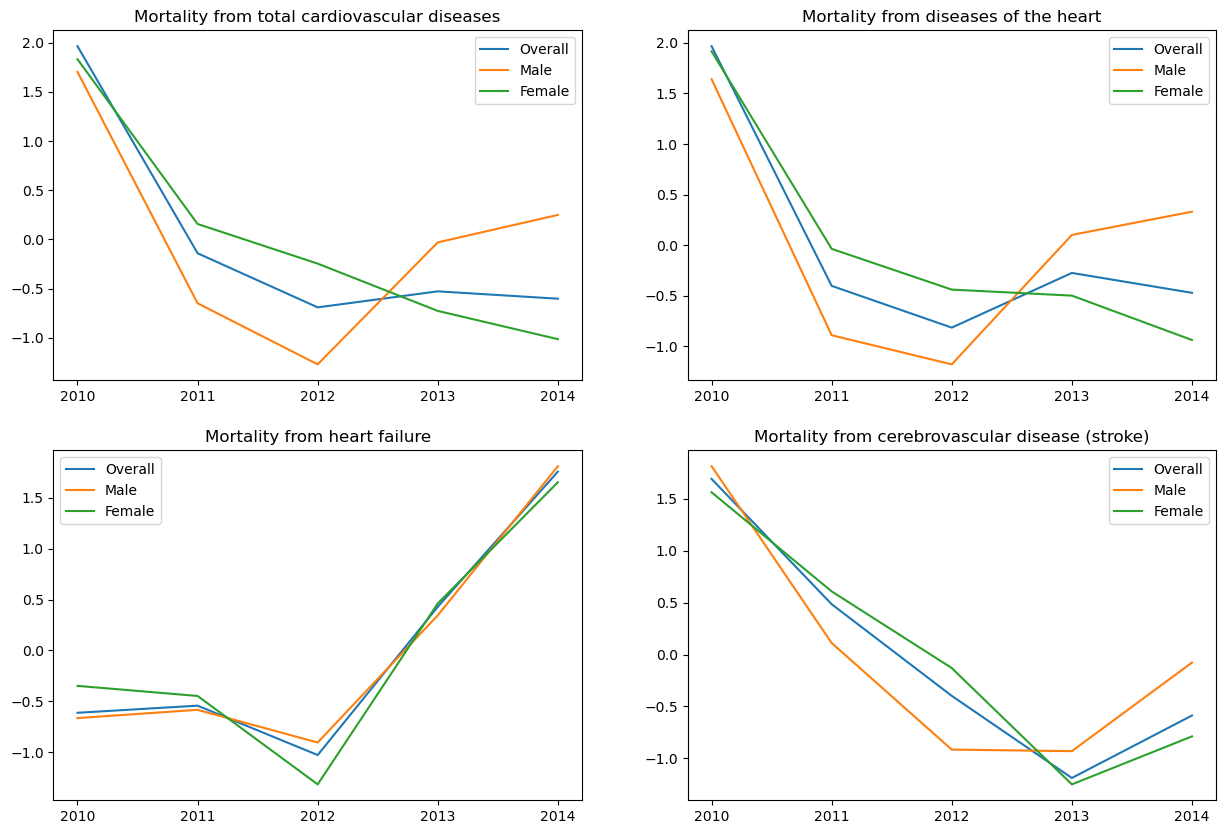

In [41]:
#Let's group the four images in a subplot 
fig,axs =plt.subplots(2,2, figsize=(15,10)) 
axs[0,0].plot(df_cvd_1_merged_norm_plt)
axs[0,0].set_title('Mortality from total cardiovascular diseases')
axs[0,1].plot(df_cvd_2_merged_norm_plt)
axs[0,1].set_title('Mortality from diseases of the heart')
axs[1,0].plot(df_cvd_3_merged_norm_plt)
axs[1,0].set_title('Mortality from heart failure')
axs[1,1].plot(df_cvd_4_merged_norm_plt)
axs[1,1].set_title('Mortality from cerebrovascular disease (stroke)')
for i in [0,1]:
    for j in [0,1]:
        axs[i,j].legend(['Overall','Male','Female'])
        axs[i,j].xaxis.set_major_locator(plt.MaxNLocator(5))


## 4. Evolution of mortality per state

In [42]:
# The most anamolous trend is mortality from heart failure. So, Exploring each state
df_cvd_mortality_heart_failure.head()

,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Year
1434,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,143.5,143.5,113.4,179.1,Race/Ethnicity,American Indian or Alaska Native,2014
1435,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,76.9,76.9,65.8,88.0,Gender,Female,2014
1436,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,100.4,100.4,85.5,115.4,Gender,Male,2014
1437,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,87.5,87.5,78.5,96.4,Overall,Overall,2014
1438,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,84.7,84.7,74.5,94.9,Race/Ethnicity,"White, non-Hispanic",2014


In [43]:
df_cvd_3ov_2010=df_cvd_mortality_heart_failure[
    (df_cvd_mortality_heart_failure['Stratification1']=='Overall')
    &
    (df_cvd_mortality_heart_failure['Year']==2010)
].groupby('LocationAbbr').sum()
df_cvd_3ov_2011=df_cvd_mortality_heart_failure[
    (df_cvd_mortality_heart_failure['Stratification1']=='Overall')
    &
    (df_cvd_mortality_heart_failure['Year']==2011)
].groupby('LocationAbbr').sum()
df_cvd_3ov_2012=df_cvd_mortality_heart_failure[
    (df_cvd_mortality_heart_failure['Stratification1']=='Overall')
    &
    (df_cvd_mortality_heart_failure['Year']==2012)
].groupby('LocationAbbr').sum()
df_cvd_3ov_2013=df_cvd_mortality_heart_failure[
    (df_cvd_mortality_heart_failure['Stratification1']=='Overall')
    &
    (df_cvd_mortality_heart_failure['Year']==2013)
].groupby('LocationAbbr').sum()
df_cvd_3ov_2014=df_cvd_mortality_heart_failure[
    (df_cvd_mortality_heart_failure['Stratification1']=='Overall')
    &
    (df_cvd_mortality_heart_failure['Year']==2014)
].groupby('LocationAbbr').sum()

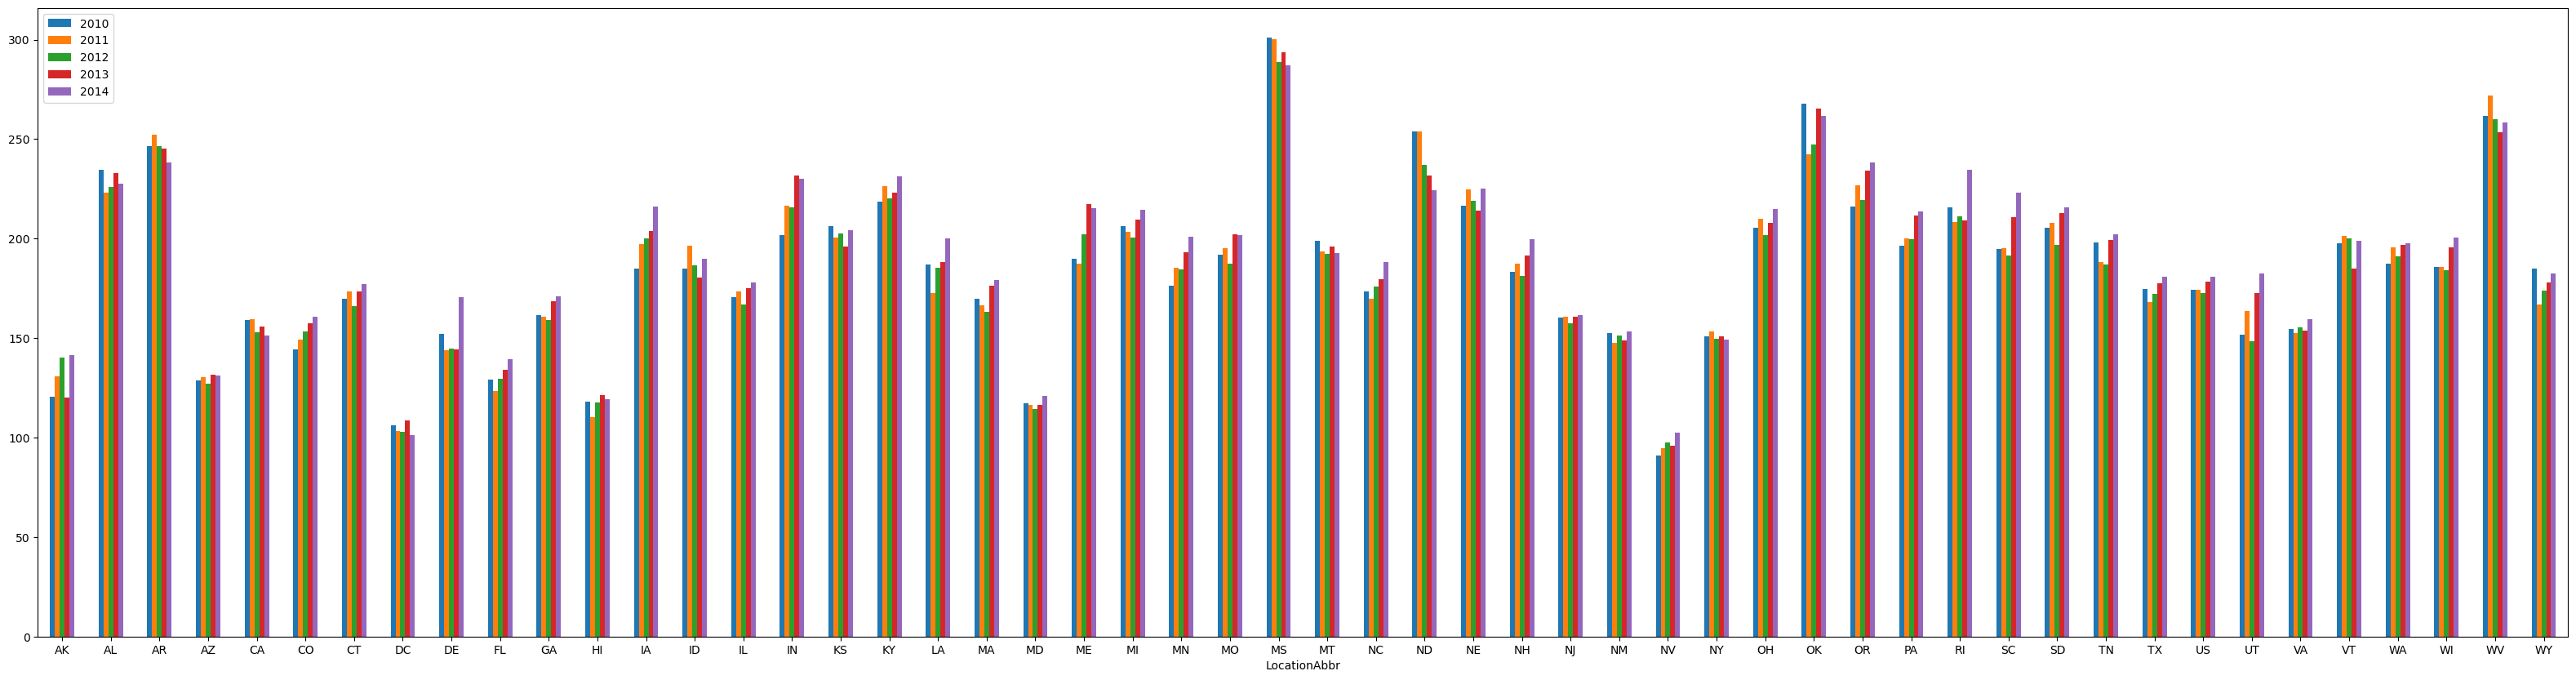

In [44]:
# Depicting the cases per 100,000 for each state regarding heart failure and overall stratification criteria

df_cvd_3_overall_year=pd.DataFrame({'2010': df_cvd_3ov_2010['DataValue'],
                    '2011': df_cvd_3ov_2011['DataValue'],
                    '2012': df_cvd_3ov_2012['DataValue'],
                    '2013': df_cvd_3ov_2013['DataValue'],
                    '2014': df_cvd_3ov_2014['DataValue']}, index=df_cvd_3ov_2010.index)
ax1 = df_cvd_3_overall_year.plot.bar(rot=0,figsize=(40,10))

In [45]:
# It's hard to see which state influence in the huge increase of the total figures per year
# So, calculating the linear regression slope from 2010 to 2014 for each state to see 
# if the slope is positive is negative or positive.

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
df_cvd_3_overall_year['Slope']=np.nan
for i in range (df_cvd_3_overall_year.shape[0]):
    x=df_cvd_3_overall_year.columns[0:4]
    y=df_cvd_3_overall_year.iloc[i,0:4]
    lr.fit(x[:, np.newaxis],y)
    df_cvd_3_overall_year['Slope'].iloc[i]=lr.coef_


# Now we can filter to those state that have a positive slope
df_cvd_3_overall_year_positive=df_cvd_3_overall_year[df_cvd_3_overall_year['Slope']>0]
df_cvd_3_overall_year_positive.describe()
    

C:\Users\hplap\AppData\Local\Temp\ipykernel_12540\2059158027.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lr.fit(x[:, np.newaxis],y)
C:\Users\hplap\AppData\Local\Temp\ipykernel_12540\2059158027.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lr.fit(x[:, np.newaxis],y)
C:\Users\hplap\AppData\Local\Temp\ipykernel_12540\2059158027.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lr.fit(x[:, np.newaxis],y)
C:\Users\hplap\AppData\Local\Temp\ipykernel_12540\2059158027.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and w

,2010,2011,2012,2013,2014,Slope
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,171.232258,173.003226,172.235484,180.393548,184.977419,2.671613
std,32.793916,34.402902,32.391321,36.302864,36.802914,2.379415
min,91.100000,94.600000,97.500000,96.000000,101.200000,0.280000
25%,156.700000,162.200000,156.200000,170.600000,174.150000,0.895000
50%,176.400000,174.300000,181.400000,188.200000,197.500000,1.800000
75%,193.450000,195.500000,194.000000,206.700000,213.900000,4.350000
max,218.500000,226.900000,220.100000,234.200000,238.400000,9.660000


C:\Users\hplap\AppData\Local\Temp\ipykernel_12540\1184304564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cvd_3_overall_year_positive_half.drop('Slope',axis=1,inplace=True)


               2010   2011   2012   2013   2014  Slope
LocationAbbr                                          
CO            144.2  149.1  153.2  157.3  160.7   4.34
FL            129.3  123.4  129.5  133.9  139.3   1.99
GA            161.7  160.6  159.2  168.6  171.1   1.93
IA            185.0  197.1  200.1  203.9  216.2   5.97
IN            201.6  216.6  215.9  231.8  230.0   8.99
ME            190.0  187.3  202.3  217.2  215.2   9.66
MN            176.4  185.4  184.6  193.3  201.0   4.99
MO            192.0  195.2  187.2  202.3  201.6   2.29
NC            173.5  169.9  175.8  179.6  188.3   2.42
NH            183.5  187.4  181.4  191.5  199.9   1.80
OR            216.2  226.9  219.3  234.2  238.4   4.64
PA            196.5  200.2  199.9  211.7  213.5   4.53
SC            194.9  195.1  191.3  210.7  223.1   4.36
UT            151.7  163.8  148.3  172.6  182.5   4.72
WA            187.5  195.8  191.2  196.8  197.5   2.33
WI            185.6  185.8  184.2  195.6  200.6   2.84


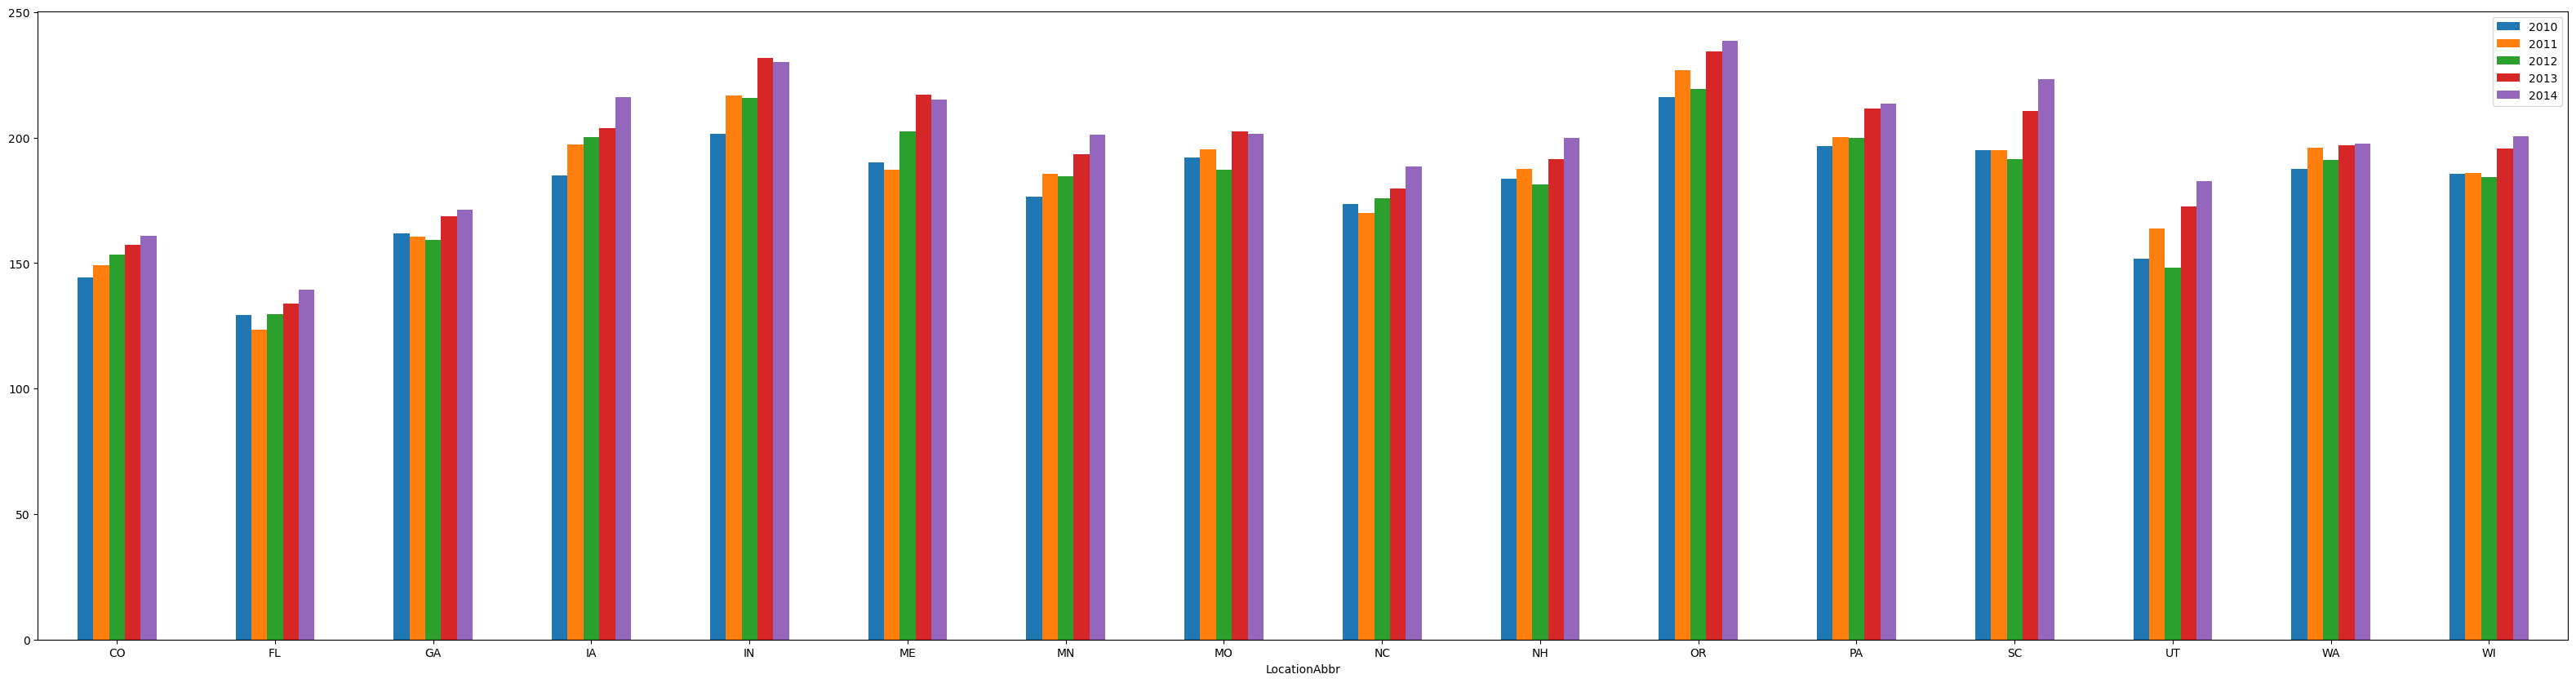

In [46]:
# depicting the second half of slope values >1.8

df_cvd_3_overall_year_positive_half=df_cvd_3_overall_year_positive[df_cvd_3_overall_year_positive['Slope']>1.79]
print(df_cvd_3_overall_year_positive_half)
df_cvd_3_overall_year_positive_half.drop('Slope',axis=1,inplace=True)
ax1 = df_cvd_3_overall_year_positive_half.plot.bar(rot=0,figsize=(40,10))

**Conclusion of the analysis**: We can see IA, IN, and ME are the state with the highest slope. Then we can state that they contribute to the sudden increase of the figure between 2012 and 2014 in the total year figures of heart failure